In [1]:
import pandas as pd
import numpy as np
import requests
import os
import re
import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", 500)
pd.set_option("max_colwidth", 800)

In [2]:
df_tweets = pd.read_csv("twitter-archive-enhanced.csv")
df_tweets

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


In [3]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open("image_predictions.tsv", mode='wb') as file:
    file.write(response.content)
    
df_im_predictions = pd.read_csv("image_predictions.tsv", sep="\t")

In [4]:
df_im_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [5]:
tweet_ids = df_tweets.tweet_id.values
len(tweet_ids)

2356

In [6]:
df_json = pd.read_json("tweet_json.txt", lines=True, encoding="utf-8")
df_json

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs®', 'screen_name': 'dog_rates', 'location': 'all our links ➜', 'description': 'Your Only Source For Professional Dog Ratings Instagram and Facebook ➜ WeRateDogs partnerships@weratedogs.com | nonprofit: @15outof10 ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀', 'url': 'https://t.co/YPc2Xq4Va2', 'entities': {'url': {'urls': [{'url': 'https://t.co/YPc2Xq4Va2', 'expanded_url': 'http://links.weratedogs.com', 'display_url': 'links.weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 9375210, 'friends_count': 20, 'listed_count': 7829, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 147500, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 17479...",NaN,NaN,None,NaN,False,6887,32950,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 1055, 'h': 1200, 'resize': 'fit'}, 'small': {'w': 598, 'h': 680, 'resize': 'fit'}, 'large': {'w': 1407, 'h': 1600, 'resize': 'fit'}}}]}","{'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/D

In [7]:
print(df_tweets['tweet_id'].info())
print(df_im_predictions['tweet_id'].info())
print(df_json['id'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 2356 entries, 0 to 2355
Series name: tweet_id
Non-Null Count  Dtype
--------------  -----
2356 non-null   int64
dtypes: int64(1)
memory usage: 18.5 KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 2075 entries, 0 to 2074
Series name: tweet_id
Non-Null Count  Dtype
--------------  -----
2075 non-null   int64
dtypes: int64(1)
memory usage: 16.3 KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 2325 entries, 0 to 2324
Series name: id
Non-Null Count  Dtype
--------------  -----
2325 non-null   int64
dtypes: int64(1)
memory usage: 18.3 KB
None


In [8]:
df_json.rename(columns={'id': 'tweet_id'},
          inplace=True, errors='raise')

In [9]:
# Doing left join ensures that we dont loose tweets without an image.
tweets_w_images = df_tweets.merge(df_im_predictions, how='left', on = "tweet_id")
# Doing right join ensures that we dont loose tweets.
joindf = df_json.merge(tweets_w_images,how = 'right', on = 'tweet_id')

In [10]:
# We see that they all have the same length.
print(len(tweets_w_images))
print(len(df_tweets))
print(len(joindf))

2356
2356
2356


In [ ]:
# Downloading the new DataFrame as tweets.csv
joindf.to_csv('tweets.csv', index=False)

# Assessing the Data

In [11]:
joindf

,created_at,tweet_id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source_x,in_reply_to_status_id_x,in_reply_to_status_id_str,in_reply_to_user_id_x,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status,in_reply_to_status_id_y,in_reply_to_user_id_y,timestamp,source_y,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,2017-08-01 16:23:56+00:00,892420643555336193,8.924206e+17,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs®', 'screen_name': 'dog_rates', 'location': 'all our links ➜', 'description': 'Your Only Source For Professional Dog Ratings Instagram and Facebook ➜ WeRateDogs partnerships@weratedogs.com | nonprofit: @15outof10 ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀', 'url': 'https://t.co/YPc2Xq4Va2', 'entities': {'url': {'urls': [{'url': 'https://t.co/YPc2Xq4Va2', 'expanded_url': 'http://links.weratedogs.com', 'display_url': 'links.weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 9375210, 'friends_count': 20, 'listed_count': 7829, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 147500, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 17479...",NaN,NaN,None,NaN,False,6887.0,32950.0,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,2017-08-01 00:17:27+00:00,892177421306343426,8.921774e+17,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls'

In [12]:
joindf.describe()

,tweet_id,id_str,in_reply_to_status_id_x,in_reply_to_status_id_str,in_reply_to_user_id_x,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str,in_reply_to_status_id_y,in_reply_to_user_id_y,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf
count,2.356000e+03,2.325000e+03,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,0.0,0.0,0.0,2325.000000,2325.000000,2193.0,2193.0,2.600000e+01,2.600000e+01,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.427716e+17,7.416926e+17,7.440692e+17,7.440692e+17,2.040329e+16,2.040329e+16,NaN,NaN,NaN,2429.325161,6884.145376,0.0,0.0,8.113972e+17,8.113972e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.856705e+16,6.814903e+16,7.524295e+16,7.524295e+16,1.260797e+17,1.260797e+17,NaN,NaN,NaN,4111.849737,10693.022480,0.0,0.0,6.295843e+16,6.295843e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.783989e+17,6.780233e+17,6.757073e+17,6.757073e+17,3.589728e+08,3.589728e+08,NaN,NaN,NaN,489.000000,1197.000000,0.0,0.0,7.761338e+17,7.761338e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.196279e+17,7.177900e+17,7.032559e+17,7.032559e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1130.000000,2986.000000,0.0,0.0,8.281173e+17,8.281173e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.993373e+17,7.986285e+17,8.233264e+17,8.233264e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,2811.000000,8411.000000,0.0,0.0,8.637581e+17,8.637581e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,69493.000000,141976.000000,0.0,0.0,8.860534e+17,8.860534e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


In [13]:
joindf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 59 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2325 non-null   datetime64[ns, UTC]
 1   tweet_id                       2356 non-null   int64              
 2   id_str                         2325 non-null   float64            
 3   full_text                      2325 non-null   object             
 4   truncated                      2325 non-null   object             
 5   display_text_range             2325 non-null   object             
 6   entities                       2325 non-null   object             
 7   extended_entities              2055 non-null   object             
 8   source_x                       2325 non-null   object             
 9   in_reply_to_status_id_x        77 non-null     float64            
 10  in_reply_to_status_id_st

In [14]:
print(joindf['possibly_sensitive_appealable'].sum())

0.0


In [15]:
print(joindf['retweeted'].value_counts())

False    2325
Name: retweeted, dtype: int64


In [16]:
print(joindf['source_x'].value_counts())
print(joindf['source_y'].value_counts())

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2191
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source_x, dtype: int64
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source_y, dtype: int64


In [17]:
joindf['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

All quality and tidiness assessment are done over the **joindf** table, which is a merge bewteen all available information.

### Quality
#### Issue 1
* id_str column is actually a float and not a string.
* truncated, is_quote_status, favorited, retweeted columns are object types instead of booleans.
* retweet_count and favorite_count are integers and are listed as floats, which make no sense since there cannot be a non integer amount of those values.
* columns in_reply_to_status_id_x, in_reply_to_status_id_str are floats.
* Same thing happens with in_reply_to_user_id_x and in_reply_to_user_id_str.

#### Issue 2
* Columns geo, place, coordinates and contributors aren't recognized by Pandas nor LibreOffice, as they combine many different data types, and its content is unnecesary for the purpose of this analysis.
* Columns possibly_sensitive and possibly_sensitive_appealable are all zeros, can be removed.

#### Issue 3
* There are 2356 entries in total, but only 2075 have images.
* There are 2325 which have the retweeted as False, the rest are empty. This leads me to believe that the empty rows represent tweets that are not originally from WeRateDogs and thats why there is not info about those.

#### Issue 4
* There are dogs named "a" in the name column. This is a mistake.

#### Issue 5
* Time columns could be separated into time/day/month/year.

#### Issue 6
* Some Columns have None values, which pandas does not recognise as a missing value, but a string.

#### Issue 7
* It is best practice to start boolean columns with is prefix. That is, instead of retweeted, is_retweeted is a better way to call that column.

#### Issue 8
* For the predictions, 2 decimals are enough and more visually appealing. 

### Tidiness

##### More relevant
* doggo, floofer, pupper, puppo could be combined into a single column called dog_cuteness_type.
* Removing tweet URL from text column since it is already given in expanded_url.

##### Less relevant
* By merging the different dataframes by tweet_id, we fixed a tidiness issue.
* Columns in_reply_to_status_id_x, in_reply_to_status_id_str are redundant and only one of them is "needed".
* The columns created_at and timestamp represent the same thing, although one of them has more rows than the other.
* text and full_text columns are the same, although ful_text has more rows.
* source_y has more info than source_x and the last can be discarted.

# Cleaning the Data

Making a copy of **joindf**, which contains all the information from the three different datasets.

In [18]:
# First lets fix the date issue

joindf['timestamp'] = pd.to_datetime(joindf['timestamp'])

joindf['Hour'] = joindf['timestamp'].dt.hour
joindf['Day'] = joindf['timestamp'].dt.day
joindf['Month'] = joindf['timestamp'].dt.month
joindf['Year'] = joindf['timestamp'].dt.year

In [19]:
df_toclean = joindf.copy()

Now, lets clean the issues

## Issue #1

### Define:

* id_str column is actually a float and not a string.
* truncated, is_quote_status, favorited, retweeted columns are object types instead of booleans.
* retweet_count and favorite_count are integers and are listed as floats, which make no sense since there cannot be a non integer amount of those values.
* columns in_reply_to_status_id_x, in_reply_to_status_id_str are floats.
* Same thing happens with in_reply_to_user_id_x and in_reply_to_user_id_str.

In [20]:
df_toclean['id_str'].dtypes

dtype('float64')

### Code

In [21]:
df_toclean['id_str'] = df_toclean['id_str'].astype("string")

### Test

In [22]:
df_toclean['id_str'].dtypes

string[python]

### Code

In [23]:
df_toclean[['truncated', 'is_quote_status','favorited', 'retweeted','p1_dog','p2_dog','p3_dog']] = df_toclean[['truncated', 'is_quote_status','favorited', 'retweeted','p1_dog','p2_dog','p3_dog']].astype('bool')

### Test

In [24]:
df_toclean[['truncated', 'is_quote_status','favorited', 'retweeted','p1_dog','p2_dog','p3_dog']].dtypes

truncated          bool
is_quote_status    bool
favorited          bool
retweeted          bool
p1_dog             bool
p2_dog             bool
p3_dog             bool
dtype: object

### Code

In [25]:
# Dropping NaN and changing type to int

df_toclean = df_toclean[pd.to_numeric(df_toclean['retweet_count'], errors='coerce').notnull()]
df_toclean[['retweet_count', 'favorite_count']] = df_toclean[['retweet_count', 'favorite_count']].astype(int)

### Test

In [26]:
df_toclean[['retweet_count', 'favorite_count']].dtypes

retweet_count     int64
favorite_count    int64
dtype: object

### Code

In [27]:
# Removing useless columns.
df_toclean.drop(['in_reply_to_status_id_x', 'in_reply_to_user_id_x'], axis=1, inplace=True)

# Changing the other two similar ones to string.
df_toclean[['in_reply_to_status_id_str','in_reply_to_user_id_str']] = df_toclean[['in_reply_to_status_id_str', 'in_reply_to_user_id_str']].astype("string")

### Test

In [28]:
df_toclean[['in_reply_to_status_id_str','in_reply_to_user_id_str']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2325 entries, 0 to 2355
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   in_reply_to_status_id_str  77 non-null     string
 1   in_reply_to_user_id_str    77 non-null     string
dtypes: string(2)
memory usage: 54.5 KB


## Issue #2

### Define:

* Columns geo, place, coordinates and contributors aren't recognized by Pandas nor LibreOffice, as they combine many different data types, and its content is unnecesary for the purpose of this analysis.
* Columns possibly_sensitive and possibly_sensitive_appealable are all zeros, can be removed.

### Code

In [29]:
df_toclean.drop(['geo','place','coordinates','contributors','possibly_sensitive_appealable','possibly_sensitive'], axis=1, inplace=True)

### Test

In [30]:
df_toclean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2325 entries, 0 to 2355
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   created_at                  2325 non-null   datetime64[ns, UTC]
 1   tweet_id                    2325 non-null   int64              
 2   id_str                      2325 non-null   string             
 3   full_text                   2325 non-null   object             
 4   truncated                   2325 non-null   bool               
 5   display_text_range          2325 non-null   object             
 6   entities                    2325 non-null   object             
 7   extended_entities           2055 non-null   object             
 8   source_x                    2325 non-null   object             
 9   in_reply_to_status_id_str   77 non-null     string             
 10  in_reply_to_user_id_str     77 non-null     string          

## Issue #3

### Define:

* There are 2356 entries in total, but only 2055 have images.

### Code

In [31]:
df_toclean['jpg_url'].isnull().value_counts()

False    2055
True      270
Name: jpg_url, dtype: int64

In [32]:
df_toclean = df_toclean[df_toclean['jpg_url'].isnull()==False]

### Test

In [33]:
print(len(df_toclean['jpg_url']))
print(len(df_toclean['tweet_id']))

# They have the same length now. We only kept the rows with images. The other were retweets or responses to other tweets.

2055
2055


In [34]:
df_toclean['jpg_url'].count()

2055

## Issue #4

### Define:

* There are dogs named "a" in the name column. This is a mistake.

### Code

In [35]:
df_toclean['name'].replace({'a':'No name mentioned'},inplace=True)

### Test

In [36]:
df_toclean['name'].value_counts()

None                 569
No name mentioned     55
Charlie               10
Penny                 10
Cooper                10
                    ... 
Emma                   1
Luna                   1
Spencer                1
Lilli                  1
Christoper             1
Name: name, Length: 934, dtype: int64

In [37]:
df_toclean['name'].info()

<class 'pandas.core.series.Series'>
Int64Index: 2055 entries, 0 to 2355
Series name: name
Non-Null Count  Dtype 
--------------  ----- 
2055 non-null   object
dtypes: object(1)
memory usage: 32.1+ KB


## Issue #5

### Define:

* Time columns could be separated into time/day/month/year.

**Note**: This Issue has been fixed before making the df_toclean copy. What is left to do is removing created_at and timestamp columns

### Code

In [38]:
df_toclean.drop(['timestamp','created_at'],axis=1,inplace=True)

### Test

In [39]:
df_toclean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2055 entries, 0 to 2355
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2055 non-null   int64  
 1   id_str                      2055 non-null   string 
 2   full_text                   2055 non-null   object 
 3   truncated                   2055 non-null   bool   
 4   display_text_range          2055 non-null   object 
 5   entities                    2055 non-null   object 
 6   extended_entities           2055 non-null   object 
 7   source_x                    2055 non-null   object 
 8   in_reply_to_status_id_str   23 non-null     string 
 9   in_reply_to_user_id_str     23 non-null     string 
 10  in_reply_to_screen_name     23 non-null     object 
 11  user                        2055 non-null   object 
 12  is_quote_status             2055 non-null   bool   
 13  retweet_count               2055 

## Issue #6

### Define:

* Some Columns have None values, which pandas does not recognise as a missing value, but a string.

### Code

In [40]:
columns = ['name', 'doggo', 'floofer', 'pupper', 'puppo']

for column in columns:
    print(df_toclean[column][df_toclean[column]=='None'].count())

569
1977
2047
1836
2031


In [41]:
for column in columns:
    df_toclean[column].replace({"None": None}, inplace=True)
    df_toclean[column].fillna(value=np.nan, inplace=True)

### Test

In [42]:
# Now the None value is not a string, but the actual None value recognized by Pandas.

df_toclean[['name', 'doggo', 'floofer', 'pupper', 'puppo']][df_toclean[['name', 'doggo', 'floofer', 'pupper', 'puppo']] =='None'].count()

name       0
doggo      0
floofer    0
pupper     0
puppo      0
dtype: int64

## Issue #7

### Define:

* It is best practice to start boolean columns with is prefix. That is, instead of retweeted, is_retweeted is a better way to call that column.

### Code

In [43]:
df_toclean.rename(columns={'retweeted': 'is_retweeted',
                   'favorited': 'is_favorited',
                    'truncated' : 'is_truncated',
                    'p1_dog' : 'is_p1_dog',
                    'p2_dog' : 'is_p2_dog',
                    'p3_dog' : 'is_p3_dog'},
          inplace=True, errors='raise')

### Test

In [44]:
df_toclean.columns

Index(['tweet_id', 'id_str', 'full_text', 'is_truncated', 'display_text_range',
       'entities', 'extended_entities', 'source_x',
       'in_reply_to_status_id_str', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'is_quote_status', 'retweet_count',
       'favorite_count', 'is_favorited', 'is_retweeted', 'lang',
       'retweeted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status_permalink', 'quoted_status', 'in_reply_to_status_id_y',
       'in_reply_to_user_id_y', 'source_y', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'is_p1_dog', 'p2', 'p2_conf', 'is_p2_dog', 'p3', 'p3_conf',
       'is_p3_dog', 'Hour', 'Day', 'Month', 'Year'],
      dtype='object')

## Issue 8

### Define:

* For the predictions, 2 decimals are enough and more visually appealing. 

### Code

In [45]:
df_toclean[['p1_conf','p2_conf','p3_conf']].head()

,p1_conf,p2_conf,p3_conf
0,0.097049,0.085851,0.076110
1,0.323581,0.090647,0.068957
2,0.716012,0.078253,0.031379
3,0.170278,0.168086,0.040836
4,0.555712,0.225770,0.175219


In [46]:
df_toclean = df_toclean.round(decimals=2)

### Test

In [47]:
df_toclean[['p1_conf','p2_conf','p3_conf']].head()

,p1_conf,p2_conf,p3_conf
0,0.10,0.09,0.08
1,0.32,0.09,0.07
2,0.72,0.08,0.03
3,0.17,0.17,0.04
4,0.56,0.23,0.18





Now we proceed to clean tidiness issues. Some of them have already been cleaned, like eliminating useless columns, but let's focus on a couple that are more complicated.

## Issue #9

### Define:

* doggo, floofer, pupper, puppo could be combined into a single column called dog_cuteness_type.

### Code

In [48]:
# Solution: https://stackoverflow.com/a/68006493

pd.options.mode.chained_assignment = None

newdf = df_toclean[['doggo', 'floofer', 'pupper', 'puppo']]

df_toclean["dog_cuteness_type"] = newdf.to_numpy()[np.arange(len(newdf)),
                          newdf.columns.get_indexer(newdf.notna().idxmax(axis=1))]

### Test

In [49]:
print(len(df_toclean['dog_cuteness_type']))
df_toclean['dog_cuteness_type'].info()

2055
<class 'pandas.core.series.Series'>
Int64Index: 2055 entries, 0 to 2355
Series name: dog_cuteness_type
Non-Null Count  Dtype 
--------------  ----- 
316 non-null    object
dtypes: object(1)
memory usage: 32.1+ KB


## Issue #10

### Define:
* Removing tweet URL from text column since it is already given in expanded_url.

### Code

In [50]:
df_toclean['text'] = df_toclean['text'].str.replace('http\S+|www.\S+', '', case=False)

### Test

In [51]:
df_toclean['text'].head()

0                                                         This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 
1    This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 
2                     This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 
3                                                               This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us 
4    This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek 
Name: text, dtype: object

## Issue #11

### Define:

* Columns in_reply_to_status_id_x, in_reply_to_status_id_str are redundant and only one of them is "needed".
* The columns created_at and timestamp represent the same thing, although one of them has more rows than the other.
* text and full_text columns are the same, although ful_text has more rows.
* source_y has more info than source_x and the last can be discarted.

Most of these issues have been solved already. The only one left is dropping source_x column.

### Code

In [53]:
df_toclean.drop('source_x',axis=1,inplace=True)

### Test

In [54]:
df_toclean.columns

Index(['tweet_id', 'id_str', 'full_text', 'is_truncated', 'display_text_range',
       'entities', 'extended_entities', 'in_reply_to_status_id_str',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user',
       'is_quote_status', 'retweet_count', 'favorite_count', 'is_favorited',
       'is_retweeted', 'lang', 'retweeted_status', 'quoted_status_id',
       'quoted_status_id_str', 'quoted_status_permalink', 'quoted_status',
       'in_reply_to_status_id_y', 'in_reply_to_user_id_y', 'source_y', 'text',
       'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'is_p1_dog', 'p2', 'p2_conf',
       'is_p2_dog', 'p3', 'p3_conf', 'is_p3_dog', 'Hour', 'Day', 'Month',
       'Year', 'dog_cuteness_type'],
      dtype='object')

## Storing the master dataframe

In [56]:
df_toclean.to_csv("twitter_archive_master.csv", index=False)

# Analyzing and Visualizing Data

3 insights are needed.

In [57]:
df = pd.read_csv("twitter_archive_master.csv")

In [58]:
df.head()

,tweet_id,id_str,full_text,is_truncated,display_text_range,entities,extended_entities,in_reply_to_status_id_str,in_reply_to_user_id_str,in_reply_to_screen_name,user,is_quote_status,retweet_count,favorite_count,is_favorited,is_retweeted,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status,in_reply_to_status_id_y,in_reply_to_user_id_y,source_y,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,is_p1_dog,p2,p2_conf,is_p2_dog,p3,p3_conf,is_p3_dog,Hour,Day,Month,Year,dog_cuteness_type
0,892420643555336193,8.924206e+17,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}",NaN,NaN,NaN,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs®', 'screen_name': 'dog_rates', 'location': 'all our links ➜', 'description': 'Your Only Source For Professional Dog Ratings Instagram and Facebook ➜ WeRateDogs partnerships@weratedogs.com | nonprofit: @15outof10 ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀', 'url': 'https://t.co/YPc2Xq4Va2', 'entities': {'url': {'urls': [{'url': 'https://t.co/YPc2Xq4Va2', 'expanded_url': 'http://links.weratedogs.com', 'display_url': 'links.weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 9375210, 'friends_count': 20, 'listed_count': 7829, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 147500, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 17479...",False,6887,32950,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.10,False,bagel,0.09,False,banana,0.08,False,16,1,8,2017,NaN
1,892177421306343426,8.921774e+17,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https:

### Insight #1

When was the most favorited tweet tweeted and when the most retweeted one?

In [99]:
mft = df[df['favorite_count'] == df['favorite_count'].max()]
mrt = df[df['retweet_count'] == df['retweet_count'].max()]

In [63]:
mft[['Day','Month','Year']]

,Day,Month,Year
834,18,6,2016


In [100]:
mrt[['Day','Month','Year']]

,Day,Month,Year
834,18,6,2016


The most favorited and retweeted tweet was made the 18th of June of 2016 and it is the same tweet.

### Insight #2

As a WeRateDogs fan, I know that they give rates above 10 to all dogs because they are all good dogs but, what was the most common rate given until 2017? Which is the latest year of data available in this dataset.

In [75]:
df['rating_numerator'].value_counts()

12      471
10      424
11      413
13      275
9       151
8        95
7        52
14       37
5        34
6        32
3        19
4        16
2         9
1         5
0         2
27        1
45        1
88        1
144       1
26        1
121       1
143       1
44        1
60        1
80        1
75        1
99        1
50        1
204       1
1776      1
165       1
15        1
84        1
24        1
420       1
Name: rating_numerator, dtype: int64

The most common rate given by WeRateDogs was 12/10

### Insight #3

Lastly, it would be interesting to know the hour distribution of tweets.

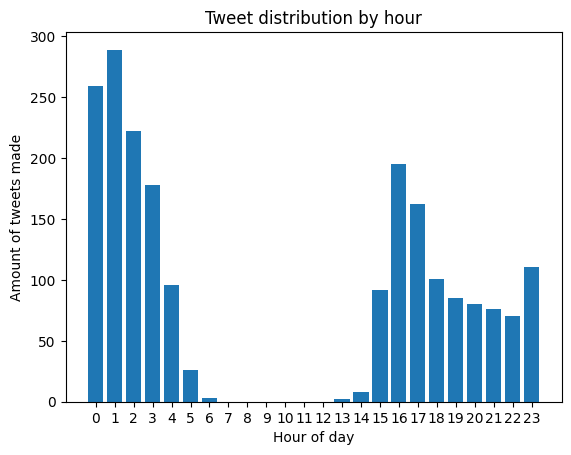

In [98]:
import matplotlib.pyplot as plt

time_dist = df.groupby(df['Hour']).count()
plt.(time_dist.index,time_dist['tweet_id'])

plt.xlabel('Hour of day')
plt.ylabel('Amount of tweets made')
plt.title('Tweet distribution by hour')
plt.xticks(np.arange(0,24,1))
plt.savefig('output.png', dpi=300)
plt.show()

The most tweets were made, surprisingly, at 1 am with 289 tweets.